# **Implementing Region-Growing Segmentation**

Image size: 1024 x 1024
Using seed point: (512, 512)


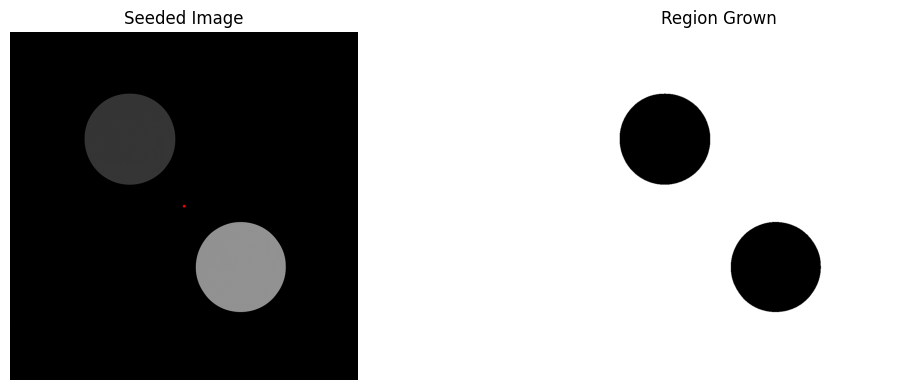

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import os

# Step 1: Load the image safely
image_path = "images/input.png"
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found at: {image_path}")

image = cv2.imread(image_path)
if image is None:
    raise ValueError("Failed to load image. Ensure the image path is correct and file is not corrupted.")

# Step 2: Convert BGR (OpenCV default) to RGB for processing
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Show shape and define safe seed point
height, width, _ = image_rgb.shape
print(f"Image size: {height} x {width}")

# Use the center of the image as seed point (or choose manually)
seed_point = (height // 2, width // 2)
print(f"Using seed point: {seed_point}")

# Step 4: Define the region-growing function
def region_growing(img, seed, threshold=30):
    """Region growing segmentation algorithm"""
    h, w, c = img.shape
    visited = np.zeros((h, w), dtype=bool)  # Matrix to mark visited pixels
    result = np.zeros((h, w), dtype=np.uint8)  # Result mask to store the region

    # Get the seed pixel value (the starting point for growing)
    seed_value = img[seed[0], seed[1], :]

    # Initialize the queue for the region-growing process
    queue = deque([seed])

    while queue:
        x, y = queue.popleft()
        if visited[x, y]:
            continue
        visited[x, y] = True

        pixel = img[x, y, :]
        # Check if the pixel is within the threshold of the seed pixel value
        if np.linalg.norm(pixel.astype(int) - seed_value.astype(int)) <= threshold:
            result[x, y] = 255  # Add the pixel to the region
            # Check all 8 neighbors (connected 8-directionally)
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < h and 0 <= ny < w and not visited[nx, ny]:
                        queue.append((nx, ny))
    return result

# Step 5: Apply the region growing algorithm
mask = region_growing(image_rgb, seed_point, threshold=30)

# Step 6: Save the region mask and seed-marked image
cv2.imwrite("outputs/task2/region_grown.png", mask)  # Save the mask as a binary image

# Create and save the image with the seed marked
seeded_image = image_rgb.copy()
cv2.circle(seeded_image, (seed_point[1], seed_point[0]), 4, (255, 0, 0), -1)  # Draw seed as a red circle
cv2.imwrite("outputs/task2/region_seeded.png", cv2.cvtColor(seeded_image, cv2.COLOR_RGB2BGR))  # Save image with the seed

# Step 7: Display the results
plt.figure(figsize=(12, 4))

# Display the seeded image
plt.subplot(1, 2, 1)
plt.title("Seeded Image")
plt.imshow(seeded_image)  # Display the image with the seed marked
plt.axis("off")

# Display the region grown result
plt.subplot(1, 2, 2)
plt.title("Region Grown")
plt.imshow(mask, cmap='gray')  # Display the result of the region growing
plt.axis("off")

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()
